In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
!pip install gradio
import gradio as gr
from fastbook import *
from fastai.vision.widgets import *

In [3]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [4]:
ims = search_images_ddg('grizzly bear')
len(ims)

200

In [5]:
dest = 'images/grizzly.jpeg'
download_url(ims[0],dest)


Path('images/grizzly.jpeg')

In [6]:
#pip install --upgrade pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 31.1 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


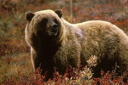

In [6]:
im = Image.open(dest)
im.to_thumb(128,128)

In [6]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')


In [13]:
if not path.exists():
  path.mkdir()
  for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok = True)
    results = search_images_ddg(f'{o} bear jpeg pics')
    download_images(dest,urls=results)

In [14]:
fn = get_image_files(path)
fn

(#575) [Path('bears/black/2853c651-7abc-47d1-95d7-561872e34bbc.jpg'),Path('bears/black/1804c05b-743a-4781-b773-4b31f59a7968.jpg'),Path('bears/black/fcb8fd59-ed1c-425d-a643-0c6fd462f34b.jpg'),Path('bears/black/f51c50e5-aae9-4fee-8908-d59f219a59e5.jpg'),Path('bears/black/f51f720e-ac5a-4231-ac29-226d2180077f.jpeg'),Path('bears/black/7c4e1e8e-0177-491a-ac9c-1abcae3ab847.jpg'),Path('bears/black/42e8c186-5428-4928-8e3d-4b861b337809.jpg'),Path('bears/black/e85cc17f-604a-4efd-b4b9-e056b53d34b2.jpg'),Path('bears/black/bcdb54fe-193f-4005-8c8c-c264b826c523.jpg'),Path('bears/black/0918dcaf-7c68-4b8e-b246-5b97e6032c95.jpg')...]

In [15]:
failed = verify_images(fn)
failed


(#9) [Path('bears/black/c91b825c-5284-47cf-b041-cfe33727023c.jpg'),Path('bears/black/4ff8f22f-69a4-4790-9a85-1edb9a22133c.jpg'),Path('bears/black/89fef8cd-50d3-4b88-ac27-d62a56e5bb6a.jpg'),Path('bears/black/81f11e2b-1308-481f-a306-fb753baa21f4.jpg'),Path('bears/black/caf18870-be86-43cd-bf81-d8260c66a36b.png'),Path('bears/teddy/93906ffa-3cdd-49d5-a9cb-86b8b7e57b4c.jpg'),Path('bears/teddy/20463409-86f0-462a-86d8-4c6566c132b6.jpg'),Path('bears/grizzly/df8fc073-85e8-48f6-a044-e85c430876a3.jpg'),Path('bears/grizzly/685a2c54-6931-443e-9acb-6e9d57aebef7.jpg')]

In [16]:
failed.map(Path.unlink)

(#9) [None,None,None,None,None,None,None,None,None]

In [12]:
??verify_images

In [29]:
pathtest = Path('bears/grizzly')
pathtest.delete(file_exts='.png')

TypeError: ignored

In [17]:
bears = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items= get_image_files,
    splitter = RandomSplitter(valid_pct=0.2,seed=42),
    get_y = parent_label,
    item_tfms = Resize(128)
)


In [18]:
bears = bears.new(
    item_tfms = RandomResizedCrop((224,224),min_scale=0.5),
    batch_tfms = aug_transforms()
)

In [19]:
dls = bears.dataloaders(path)


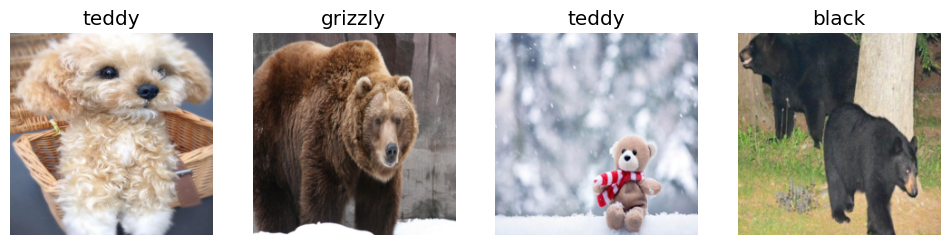

In [53]:
dls.valid.show_batch(max_n=4,nrows=1)

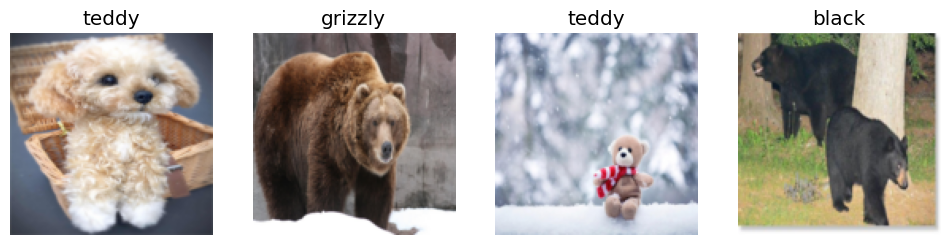

In [54]:
bears = bears.new(item_tfms = Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

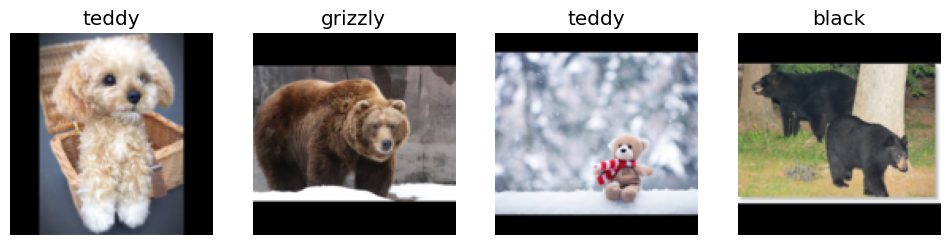

In [19]:
bears = bears.new(item_tfms = Resize(128, ResizeMethod.Pad,pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

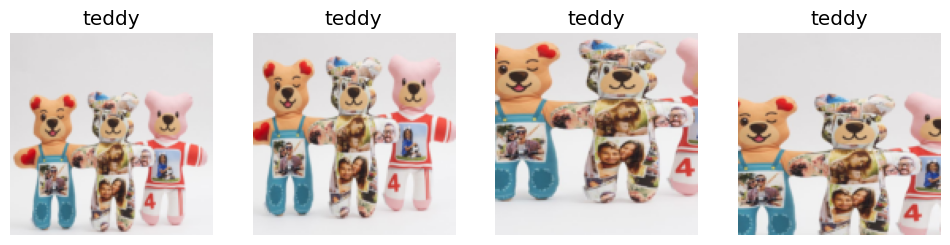

In [20]:
bears = bears.new(item_tfms =RandomResizedCrop((128,128),min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4,nrows=1,unique=True)

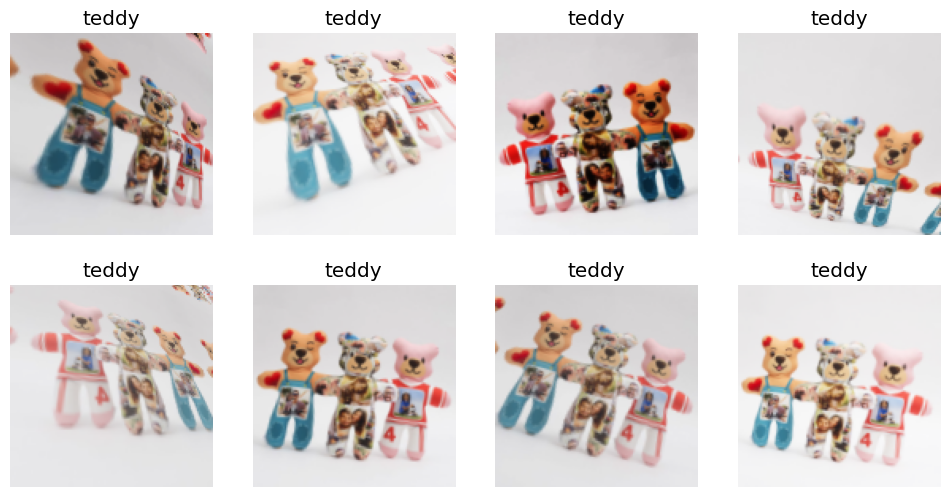

In [21]:
bears = bears.new(item_tfms=Resize(128),batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8,nrows=2,unique=True)

In [55]:
bears = bears.new(
    item_tfms=RandomResizedCrop((224,224),min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = bears.dataloaders(path)

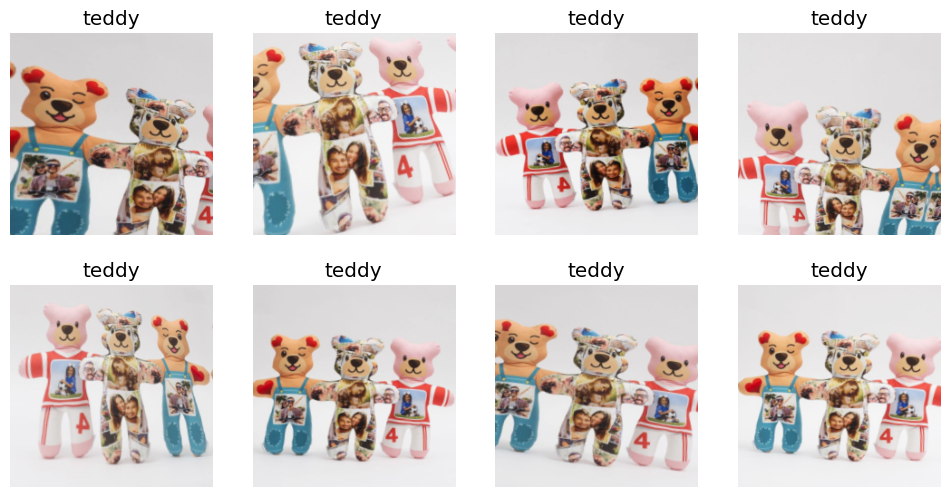

In [56]:
dls.train.show_batch(max_n=8,nrows=2,unique=True)

In [20]:
learn = cnn_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.091360,0.321572,0.070796,00:18


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.223311,0.269510,0.070796,00:17
1,0.180946,0.321734,0.070796,00:18
2,0.140233,0.332696,0.070796,00:20
3,0.123310,0.326300,0.070796,00:17


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes sh

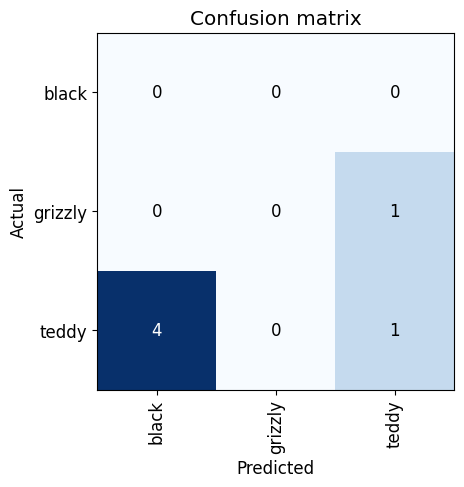

In [70]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

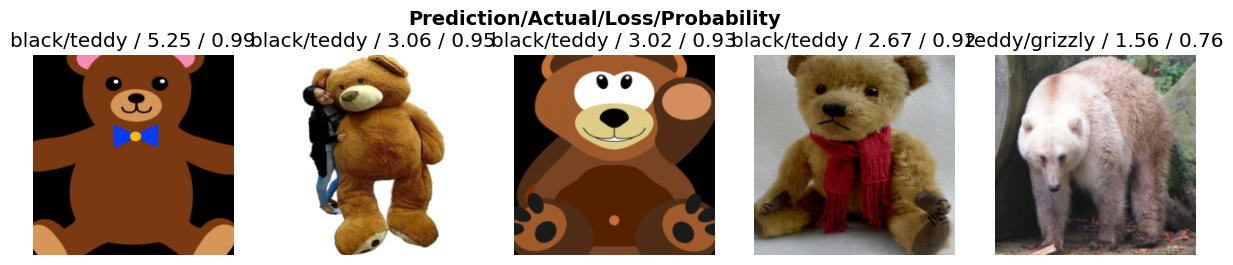

In [71]:
interp.plot_top_losses(5,nrows=1)

In [ ]:
fn

In [72]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]),path/cat)


In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('images/grizzly.jpeg')

('grizzly', tensor(1), tensor([2.3607e-03, 9.9755e-01, 9.1265e-05]))

In [ ]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [ ]:
from ipywidgets import widgets
btn_upload = widgets.FileUpload()

In [ ]:
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)


In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.4f}'
lbl_pred

Label(value='Prediction: teddy; Probability: 1.0000')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
VBox([widgets.Label('Select your bear!'),btn_upload, btn_run, out_pl,lbl_pred])

In [ ]:
def on_click_classify(change):
  img = PILImage.create(btn_upload)
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128))
  pred,pred_idx,probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.4f}'

btn_run.on_click(on_click_classify)

In [ ]:

image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['images/grizzly.jpg']

intf = gr.Interface(fn = classify_image, inputs = image,outputs = label,examples=examples)
intf.launch(inline=False,share=True)